In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.signal import savgol_filter

In [ ]:
https://github.com/sohan-py/SupportResistance/blob/main/support_resistance.py

In [2]:
data = pd.read_csv('../../data/BTCUSDT-1h-data.csv')
data.loc[:,'timestamp'] = pd.to_datetime(data.timestamp)
data = data.set_index('timestamp')

In [12]:
data = data.iloc[-60:]

In [13]:
def savgol_smoothing(series, polyorder=3):
    month_diff = series.shape[0] // 30
    if month_diff == 0: # If we have 0 months worth of prices, edit the variable to = 1
        month_diff = 1
    smooth = int(2 * month_diff + 3) # Level of smoothness in our graph
    return savgol_filter(series, smooth, polyorder=polyorder) # 3 is the order of the polynomials

In [17]:
data.loc[:,'close_smoothed'] = savgol_smoothing(data.close)

/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='timestamp'>

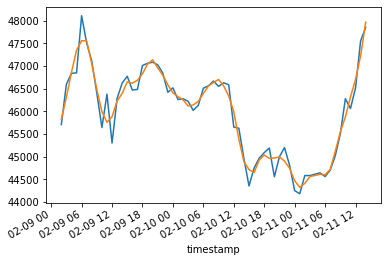

In [18]:
data.close.plot()
data.close_smoothed.plot()